In [7]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import simps

import importlib

In [116]:
from radmodel import uprint

importlib.reload(FridgeModel)
from FridgeModel import *

In [117]:
model = ThermalSystem(name='TIM subKelvin system - He 10')
stages = [Stages(name='4k', T0=4.2), Stages(name='1k', T0=.9), \
          Stages(name='0.3k', T0=.25)]

model.add_stages(stages)

# radiation
model.add_linkage(Radi(name='Rad_4k_1k', area = 100, s1=model.stages[0], \
                            s2=model.stages[1]))
model.add_linkage(Radi(name='Rad_4k_03k', area = 1200, s1=model.stages[0], \
                            s2=model.stages[2]))


# carbon fiber rods
CF_AL = 20 * np.pi *(2.e-3**2-1.5e-3**2)/0.1
model.add_linkage(Cond(name='CF_rod_4k_1k', AOverL = CF_AL, material=CF, s1=model.stages[0], \
                            s2=model.stages[1]))

CF_AL2 = 20 * np.pi *(2e-3**2-1.5e-3**2)/0.1
model.add_linkage(Cond(name='CF_rod_1k_03k', AOverL = CF_AL2, material=CF, s1=model.stages[1], \
                            s2=model.stages[2]))


# model.add_linkage(Cond(name='HS_4k_1k', AOverL = 2e-5, material='SS', s1=model.stages[0], \
#                             s2=model.stages[1]))


Wire_AOverL = (4*2+2) * np.pi*(8.6e-4**2 - 7e-4**2)/0.2
model.add_linkage(Cond(name='Wire_4k_1k', AOverL = Wire_AOverL, material=SS, s1=model.stages[0], \
                            s2=model.stages[1]))

Wire_AOverL2 = (4*2+2) * np.pi*(8.6e-4**2 - 7e-4**2)/0.15
model.add_linkage(Cond(name='Wire_1k_03k', AOverL = Wire_AOverL2, material=SS, s1=model.stages[1], \
                            s2=model.stages[2]))




# fridge
model.add_linkage(Fridge(name='He3_4k_03k', s1=model.stages[0], s2=model.stages[2], \
                        stp = 8, heaterE=4600, no_load_time=48*3600,))


model.showSystem()

System: TIM subKelvin system - He 10
Stages:
   4k , Temp: 4.20K
   1k , Temp: 0.90K
   0.3k , Temp: 0.25K
Linkages:
  Rad_4k_1k		 | 4k to 1k	 | Radiation	 | area: 1.00e+02 cm^2
  Rad_4k_03k		 | 4k to 0.3k	 | Radiation	 | area: 1.20e+03 cm^2
  CF_rod_4k_1k		 | 4k to 1k	 | Conduction	 | CF, A/L: 1.10e-03 m
  CF_rod_1k_03k		 | 1k to 0.3k	 | Conduction	 | CF, A/L: 1.10e-03 m
  Wire_4k_1k		 | 4k to 1k	 | Conduction	 | SS304, A/L: 3.92e-05 m
  Wire_1k_03k		 | 1k to 0.3k	 | Conduction	 | SS304, A/L: 5.23e-05 m
  He3_4k_03k		 | 4k to 0.3k	 | Fridge


In [118]:
model.calLoads()
model.showLoads()
model.showFridge()

Fluxs on links:
  Link:  Rad_4k_1k	 | 4k to 1k	 | Flux:  176.074 nW
  Link: Rad_4k_03k	 | 4k to 0.3k	 | Flux:   2.117 uW
  Link: CF_rod_4k_1k	 | 4k to 1k	 | Flux:  65.482 uW
  Link: CF_rod_1k_03k	 | 1k to 0.3k	 | Flux:   3.121 uW
  Link: Wire_4k_1k	 | 4k to 1k	 | Flux:  21.413 uW
  Link: Wire_1k_03k	 | 1k to 0.3k	 | Flux:  885.272 nW
Static Loads on stages:
  Stage: 4k	  Load:  -89.188 uW
  Stage: 1k	  Load:  83.064 uW
  Stage: 0.3k	  Load:   6.124 uW
Fridge:
  Link: He3_4k_03k	 Avg MT Load:  42.959 mW 
  Hold Time: 29.74 h	 Cycle Efficiency: 0.933 	
  Ext Load: 6.12 uW	 Parasitic Load: 51.67 uW	
  Flowrate when cycle: 0.031 g/s


In [121]:
model2 = ThermalSystem(name='TIM subKelvin system - SFT')
stages2 = [Stages(name='4k', T0=4.2), Stages(name='1k', T0=1.47), \
          Stages(name='0.3k', T0=.25)]

model2.add_stages(stages2)

# radiation
model2.add_linkage(Radi(name='Rad_4k_1k', area = 100, s1=model2.stages[0], \
                            s2=model2.stages[1]))
model2.add_linkage(Radi(name='Rad_4k_03k', area = 1200, s1=model2.stages[0], \
                            s2=model2.stages[2]))


# SFT G10 support
SFT_support = 1.35e-3 #m
model2.add_linkage(Cond(name='G10_ring_4k_1k', AOverL = SFT_support, material=G10, s1=model2.stages[0], \
                            s2=model2.stages[1]))

# SFT SS pump tube
SFT_pt = 1.9e-5 #m
model2.add_linkage(Cond(name='Pump_tube_4k_1k', AOverL = SFT_pt, material=SS, s1=model2.stages[0], \
                            s2=model2.stages[1]))

# SFT SS pump tube
SFT_cap = 1.e-6 #m
model2.add_linkage(Cond(name='Cap_4k_1k', AOverL = SFT_cap, material=SS, s1=model2.stages[0], \
                            s2=model2.stages[1]))


# carbon fiber rods
CF_AL = 20 * np.pi *(2.e-3**2-1.5e-3**2)/0.1
model2.add_linkage(Cond(name='CF_rod_4k_1k', AOverL = CF_AL, material=CF, s1=model2.stages[0], \
                            s2=model2.stages[1]))

CF_AL2 = 20 * np.pi *(2e-3**2-1.5e-3**2)/0.1
model2.add_linkage(Cond(name='CF_rod_1k_03k', AOverL = CF_AL2, material=CF, s1=model2.stages[1], \
                            s2=model2.stages[2]))


# model.add_linkage(Cond(name='HS_4k_1k', AOverL = 2e-5, material='SS', s1=model.stages[0], \
#                             s2=model.stages[1]))


Wire_AOverL = (4*2+2) * np.pi*(8.6e-4**2 - 7e-4**2)/0.2
model2.add_linkage(Cond(name='Wire_4k_1k', AOverL = Wire_AOverL, material=SS, s1=model2.stages[0], \
                            s2=model2.stages[1]))

Wire_AOverL2 = (4*2+2) * np.pi*(8.6e-4**2 - 7e-4**2)/0.15
model2.add_linkage(Cond(name='Wire_1k_03k', AOverL = Wire_AOverL2, material=SS, s1=model2.stages[1], \
                            s2=model2.stages[2]))




# fridge
model2.add_linkage(Fridge(name='He3_1k_03k', s1=model2.stages[1], s2=model2.stages[2], \
                        stp = 8, heaterE=1500, no_load_time=48*3600))


model2.showSystem()

System: TIM subKelvin system - SFT
Stages:
   4k , Temp: 4.20K
   1k , Temp: 1.47K
   0.3k , Temp: 0.25K
Linkages:
  Rad_4k_1k		 | 4k to 1k	 | Radiation	 | area: 1.00e+02 cm^2
  Rad_4k_03k		 | 4k to 0.3k	 | Radiation	 | area: 1.20e+03 cm^2
  G10_ring_4k_1k		 | 4k to 1k	 | Conduction	 | G10, A/L: 1.35e-03 m
  Pump_tube_4k_1k		 | 4k to 1k	 | Conduction	 | SS304, A/L: 1.90e-05 m
  Cap_4k_1k		 | 4k to 1k	 | Conduction	 | SS304, A/L: 1.00e-06 m
  CF_rod_4k_1k		 | 4k to 1k	 | Conduction	 | CF, A/L: 1.10e-03 m
  CF_rod_1k_03k		 | 1k to 0.3k	 | Conduction	 | CF, A/L: 1.10e-03 m
  Wire_4k_1k		 | 4k to 1k	 | Conduction	 | SS304, A/L: 3.92e-05 m
  Wire_1k_03k		 | 1k to 0.3k	 | Conduction	 | SS304, A/L: 5.23e-05 m
  He3_1k_03k		 | 1k to 0.3k	 | Fridge


In [122]:
model2.calLoads()
model2.showLoads()
model2.showFridge()

Fluxs on links:
  Link:  Rad_4k_1k	 | 4k to 1k	 | Flux:  173.798 nW
  Link: Rad_4k_03k	 | 4k to 0.3k	 | Flux:   2.117 uW
  Link: G10_ring_4k_1k	 | 4k to 1k	 | Flux:  166.249 uW
  Link: Pump_tube_4k_1k	 | 4k to 1k	 | Flux:   9.477 uW
  Link:  Cap_4k_1k	 | 4k to 1k	 | Flux:  498.801 nW
  Link: CF_rod_4k_1k	 | 4k to 1k	 | Flux:  59.154 uW
  Link: CF_rod_1k_03k	 | 1k to 0.3k	 | Flux:   9.272 uW
  Link: Wire_4k_1k	 | 4k to 1k	 | Flux:  19.557 uW
  Link: Wire_1k_03k	 | 1k to 0.3k	 | Flux:   2.938 uW
Static Loads on stages:
  Stage: 4k	  Load:  -257.226 uW
  Stage: 1k	  Load:  242.900 uW
  Stage: 0.3k	  Load:  14.327 uW
Fridge:
  Link: He3_1k_03k	 Avg MT Load:  15.996 mW 
  Hold Time: 26.05 h	 Cycle Efficiency: 0.923 	
  Ext Load: 14.33 uW	 Parasitic Load: 51.67 uW	
  Flowrate when cycle: 0.010 g/s


In [109]:
load = 25*1e-3

L = 20.9 # J/g
rho = 125 #g/L

rate = 86400*load/(L*rho)

print(rate)
print(250/rate)

0.8267942583732057
302.37268518518516


In [23]:
_this_dir = 'cryoModel'

T_G10, k_G10 = np.loadtxt(_this_dir+'/thermalProp/g10_cv_combined.txt', unpack = True)

T_CF, k_CF = np.loadtxt(_this_dir+'/thermalProp/CF_cv.txt', unpack = True)


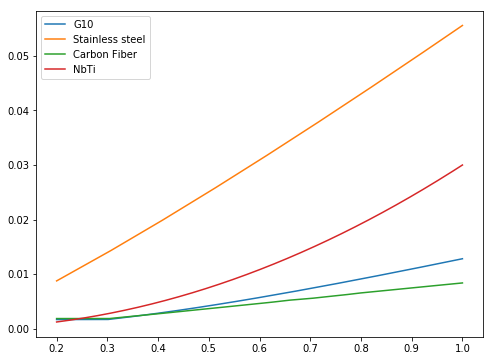

In [44]:
fig, ax = plt.subplots(figsize=(8,6))

T = np.linspace(0.2, 1, 300)

G10_func = np.interp(T, T_G10, k_G10)
CF_func = np.interp(T, T_CF, k_CF)
SS_func = np.interp(T, np.concatenate((SSlow,SShigh))[:,0], np.concatenate((SSlow,SShigh))[:,1])

plt.plot(T, G10_func, label= 'G10')
plt.plot(T, SS_func, label= 'Stainless steel')
plt.plot(T, CF_func, label= 'Carbon Fiber')
plt.plot(T, 0.3e-3*T**2*100, label= 'NbTi')

# plt.yscale('log')
# plt.xscale('log')

plt.legend()

1.5500139758995866 0 4.200376752756975 0.040350682708337866
1.2729578844455418


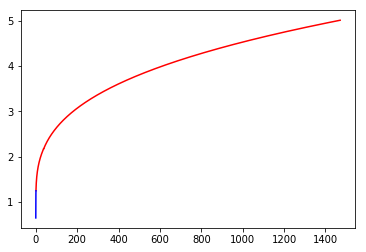

In [103]:
#!/usr/bin/env python

import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d


'''
http://www.nist.gov/srd/upload/jpcrd551.pdf
Page 1267
'''

a_90_1 = [1.392408,0.527153,0.166756,0.050988,0.026514,0.001975,-0.017976,0.005409,0.013259,0.0]
a_90_2 = [3.146631,1.357655,0.413923,0.091159,0.016349,0.001826,-0.004325,0.004973,0.0,0.0]
B1 = 5.6
C1 = 2.9
B2 = 10.3
C2 = 1.9

def T90(pressure):
	#Input pressure is in Torr
	pressure = pressure*133.322 #Convert to Pa from Torr
	temp = 0
	if(pressure >= 0.8626*133.322 and pressure <= 37.82*133.322):
		for x,y in enumerate(a_90_1):
			temp =  temp + y*math.pow((math.log(pressure)-B1)/C1,x)
	elif(pressure > 37.82*133.322 and pressure <= 1471*133.322):
		for x,y in enumerate(a_90_2):
			temp =  temp + y*math.pow((math.log(pressure)-B2)/C2,x)
	else:
		temp = 0
	return temp

def P90(temp):
	log_p = 12.2440 - 59.83/(8.314510*float(temp)) + (5.0/2.0)*math.log(float(temp))
	pressure = math.exp(log_p) 
	pressure = pressure/10.0 #Not sure why there is a divide by 10 here...
	pressure = pressure/133.322 #Convert Pa to Torr
	return pressure
	
print(T90(597.1/133.322),T90(1.475/133.322),T90(99230/133.322),P90(0.900))

temp = []
pressure = []
for i in range(8626,14710000,100):
	pressure.append(i/10000.0)
	temp.append(T90(i/10000.0))

temp2 = []
pressure2 = []
for i in range(650,1250,1):
	temp2.append(i/1000.0)
	pressure2.append(P90(i/1000.0))

temp_interp = interp1d(pressure,temp,kind='linear',bounds_error=False,fill_value = 0)
print(temp_interp(0.999))




plt.plot(pressure,temp, 'r')
plt.plot(pressure2, temp2, 'b')

plt.show()

In [116]:

'''
He4 Vapor Pressure to temperature: Emperical formula
http://journals.aps.org/pr/pdf/10.1103/PhysRev.100.743
'''

def He4Pressure(temp):
    
    I = 4.6202
    A = 6.399
    B = 2.541
    C = 0.00612
    D = 0.5197
    alpha = 7.00
    beta  = 14.14
    
    log_p = I - (A/temp)+B*np.log(temp)+(C/2.0)*temp**2 
    log_p = log_p - D*((alpha*beta)/(np.power(beta,2)+1) - temp**-1)*np.arctan(alpha*temp-beta) 
    log_p = log_p - (alpha*D)/(2*(beta**2+1))*np.log((temp**2)/(1+(alpha*temp-beta)*(alpha*temp-beta)))
    return np.exp(log_p)

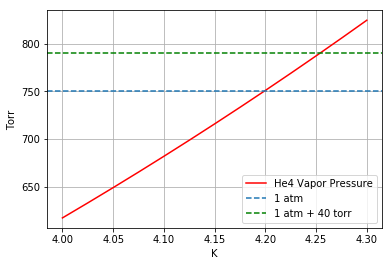

In [169]:
T = np.linspace(4.0, 4.3, 300)
P = He4Pressure(T)

atm = 750
dp  = 40


plt.plot(T, P, 'r', label = "He4 Vapor Pressure")
plt.axhline(y=atm, ls='--', label='1 atm')
plt.axhline(y=atm+dp, c='g', ls='--', label='1 atm + 40 torr')

# plt.yscale('log')

plt.xlabel('K')
plt.ylabel('Torr')

plt.legend()

plt.grid()

plt.savefig('he4_VP.png', dpi=120)

In [122]:
He4Pressure(4.1)

682.0224621719864

In [127]:
from scipy import interpolate

He4Temp = interpolate.interp1d(P, T)

In [131]:
He4Temp([760, 778])

array([4.21251363, 4.23736817])